# Итоговая работа по курсу «Python и математика для анализа данных»

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Список-задач" data-toc-modified-id="Список-задач-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Список задач</a></span></li><li><span><a href="#Загрузить-файл-hr.csv" data-toc-modified-id="Загрузить-файл-hr.csv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузить файл hr.csv</a></span><ul class="toc-item"><li><span><a href="#basic" data-toc-modified-id="basic-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>basic</a></span></li><li><span><a href="#pandas-profile-report" data-toc-modified-id="pandas-profile-report-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>pandas profile report</a></span></li></ul></li><li><span><a href="#Рассчитать-основные-статистики-для-переменных-(среднее,медиана,мода,мин/макс,сред.отклонение)" data-toc-modified-id="Рассчитать-основные-статистики-для-переменных-(среднее,медиана,мода,мин/макс,сред.отклонение)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)</a></span></li><li><span><a href="#Рассчитать-и-визуализировать-корреляционную-матрицу-для-переменных" data-toc-modified-id="Рассчитать-и-визуализировать-корреляционную-матрицу-для-переменных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Рассчитать и визуализировать корреляционную матрицу для переменных</a></span></li><li><span><a href="#Визуализировать-несколько-взаимосвязей-между-переменными" data-toc-modified-id="Визуализировать-несколько-взаимосвязей-между-переменными-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Визуализировать несколько взаимосвязей между переменными</a></span></li><li><span><a href="#С-использованием-t-test-статистики-проверить-взаимосвязи-между-несколькими-переменными" data-toc-modified-id="С-использованием-t-test-статистики-проверить-взаимосвязи-между-несколькими-переменными-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>С использованием t-test статистики проверить взаимосвязи между несколькими переменными</a></span></li><li><span><a href="#Рассчитать-сколько-работников-работает-в-каждом-департаменте" data-toc-modified-id="Рассчитать-сколько-работников-работает-в-каждом-департаменте-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Рассчитать сколько работников работает в каждом департаменте</a></span></li><li><span><a href="#Показать-распределение-сотрудников-по-зарплатам" data-toc-modified-id="Показать-распределение-сотрудников-по-зарплатам-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Показать распределение сотрудников по зарплатам</a></span></li><li><span><a href="#Показать-распределение-сотрудников-по-зарплатам-совместно-с-департаментами" data-toc-modified-id="Показать-распределение-сотрудников-по-зарплатам-совместно-с-департаментами-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Показать распределение сотрудников по зарплатам совместно с департаментами</a></span></li><li><span><a href="#Сколько-сотрудников-покинули-компанию" data-toc-modified-id="Сколько-сотрудников-покинули-компанию-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Сколько сотрудников покинули компанию</a></span></li><li><span><a href="#Проверить-несколько-гипотез-для-данных,-чтобы-понять-почему-сотрудники-покидают-компанию" data-toc-modified-id="Проверить-несколько-гипотез-для-данных,-чтобы-понять-почему-сотрудники-покидают-компанию-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию</a></span><ul class="toc-item"><li><span><a href="#Определение-текучести-кадров" data-toc-modified-id="Определение-текучести-кадров-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Определение текучести кадров</a></span></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Гипотезы</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

In [5]:
from IPython.display import IFrame
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
import statistics as stats
%matplotlib inline

## Список задач

Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

## Загрузить файл hr.csv

### basic

In [6]:
dataset = pd.read_csv('HR.csv')

In [7]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

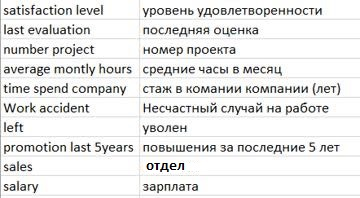

In [8]:
Image("description.jpg")

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
dataset.duplicated().sum()

3008

В нашем датасете отсутствуют id сотрудников, так что
у нас вполне могут быть сотрудники, задействованные на одном проекте, работающие в одном отделе с одинаковой годовой оценкой и т.д. (коллеги).

Пример такой выборки:

In [ ]:
dataset[(dataset.duplicated()==True)
        &(dataset['satisfaction_level']==0.46)
        & (dataset['number_project']==2)
        & (dataset['last_evaluation'] > 0.50)
        & (dataset['sales']=='sales')
        & (dataset['average_montly_hours']==139)
       ]

**Дубликаты не удаляем.**

### pandas profile report

In [ ]:
dataset.profile_report()

## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
dataset.describe()

In [ ]:
dataset.median()

In [ ]:
dataset.select_dtypes(include='object').mode()

In [ ]:
dataset.mode()

## Рассчитать и визуализировать корреляционную матрицу для переменных

In [ ]:
corr_matrix = dataset.corr()
corr_matrix

In [ ]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

## Визуализировать несколько взаимосвязей между переменными

In [ ]:
sns.pairplot(dataset,vars=['last_evaluation', 'average_montly_hours', 'satisfaction_level', 'left'], kind="scatter")

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными

## Рассчитать сколько работников работает в каждом департаменте

In [ ]:
pd.merge(
        dataset.sales.value_counts().to_frame().reset_index(),
        dataset.sales.value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )

In [ ]:
dataset.sales.value_counts().plot(kind='pie')

## Показать распределение сотрудников по зарплатам

In [ ]:
pd.merge(
        dataset['salary'].value_counts().to_frame().reset_index(),
        dataset['salary'].value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )

In [ ]:
dataset.salary.value_counts().plot(kind='pie')

## Показать распределение сотрудников по зарплатам совместно с департаментами

In [ ]:
dataset.groupby(['sales'])['salary'].value_counts(normalize=True).to_frame().unstack().round(3)*100

In [ ]:
dataset.groupby(['sales'])['salary'].value_counts(normalize=True).to_frame().unstack().plot(kind='bar', stacked=True)

Здесь мы можем увидеть, что распределение зарплат внутри отделов примерно одинаковое за исключением управленческого деартамента, в котором доля зарплат высокго уровня значительно выше, чем в остальных департаментах _(зарплаты уровней низкий и средний соответственно ниже)_.

Посмотрим на распределение зарплат по департаментам без отдела менеджмента.

In [ ]:
(
dataset
     .query('sales != "management"')
     .groupby(['sales'])['salary']
     .value_counts(normalize=True)
     .to_frame().unstack()
).plot(kind='bar', stacked=True)

Из столбчатой диаграммы не очень понятно присутствуют ли еще какие-либо различия в распределении зарплат

Постороим боксплот

In [ ]:
(
dataset
    .query('sales != "management"')
    .groupby(['sales'])['salary']
    .value_counts(normalize=True)
    .to_frame().unstack()
    #.describe()
).boxplot()

Выбросы есть, но не ясно в каких департаментах

In [ ]:
medium_ = (dataset
    .query('sales != "management"')
    .groupby(['sales'])['salary']
    .value_counts(normalize=True)
    .unstack().sort_values(by='medium')
).tail(2).index

high_ = (dataset
    .query('sales != "management"')
    .groupby(['sales'])['salary']
    .value_counts(normalize=True)
    .unstack().sort_values(by='high')
).tail(2).index

In [ ]:
print(f'{medium_.to_list()}\n{high_.to_list()}')

 - В отделе менеджмента уровень зарплат выше
 - Средний уровень зарплат чаще встречается в отделе кадров и отделе НИОКР
 - Высокий уровень зарплат чаще встречается в отделах маркетинга и  бухгалтерии

## Сколько сотрудников покинули компанию

In [ ]:
dataset.left.sum()

Компанию покинуло 3571 человек

## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Определение текучести кадров 

Минутка гуглежа

In [3]:
IFrame('https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BA%D1%83%D1%87%D0%B5%D1%81%D1%82%D1%8C_%D0%BA%D0%B0%D0%B4%D1%80%D0%BE%D0%B2', width=900, height=600)

**Из статьи мы узнали:**
 - 3-5% в год это нормально
 - высокая текучесть это плохо
 - экстремально низкая тоже плохо

Также на стали известны 
**факторы, влияющие на текучесть кадров:**
- Материальные (неконкурентоспособные ставки оплаты, несправедливая структура оплаты, нестабильные заработки);
- Организационные (график, режим, условия работы не соответствующие ожиданиям сотрудника, отсутствие возможности карьерного роста, повышения квалификации);
- Межличностные (взаимоотношения с руководством и коллегами).
- Возраст сотрудника (наиболее рискованный возраст перехода на другую работу до 25 лет);
- Квалификация сотрудника (чем ниже квалификация, тем чаще меняют работу);
- Место жительства сотрудника (чем дальше сотрудник живет от работы, тем больше риск его ухода);
- Стаж работы на предприятии (после трех лет стажа происходит резкое снижение текучести, что объясняется как фактором возраста, так и проблемами адаптации).

На основе этих фактором можно выдвинуть некоторые гипотезы.

### Гипотезы

In [ ]:
employees_lefted = dataset[ dataset['left']==1 ]

In [ ]:
employees_lefted.head(15)

### Проверка гипотез

### Выводы